In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from fastai.vision import *

In [ ]:
folders = ['leopard' , 'tiger' , 'cheetah']
file = ['leopard.txt' , 'tiger.txt' , 'cheetah.txt']

In [ ]:
!ls "/content/drive/My Drive/datasets"

cat_family


In [ ]:
path = r"/content/drive/My Drive/datasets/cat_family"

In [ ]:
classes = ['leopard' , 'tiger' , 'cheetah']

In [ ]:
download_images( "/content/drive/My Drive/datasets/cat_family/leopard/leopard.txt" ,
                  "/content/drive/My Drive/datasets/cat_family/leopard" , max_pics = 200)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
download_images( "/content/drive/My Drive/datasets/cat_family/cheetah/cheetah.txt" ,
                  "/content/drive/My Drive/datasets/cat_family/cheetah" , max_pics = 200)

In [ ]:
download_images( "/content/drive/My Drive/datasets/cat_family/tiger/tiger.txt" ,
                  "/content/drive/My Drive/datasets/cat_family/tiger" , max_pics = 200)

In [ ]:
for c in classes:
  print(c)
  verify_images(r"/content/drive/My Drive/datasets/cat_family/"+c , delete = True , max_size = 500)

leopard


tiger


cheetah


In [ ]:
import numpy

In [ ]:
path = "/content/drive/My Drive/datasets/cat_family"

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path , train = "." , valid_pct = 0.2 ,
                                  ds_tfms = get_transforms() , size = 224 , 
                                  num_workers = 4).normalize(imagenet_stats)

In [ ]:
data.classes

['cheetah', 'leopard', 'tiger']

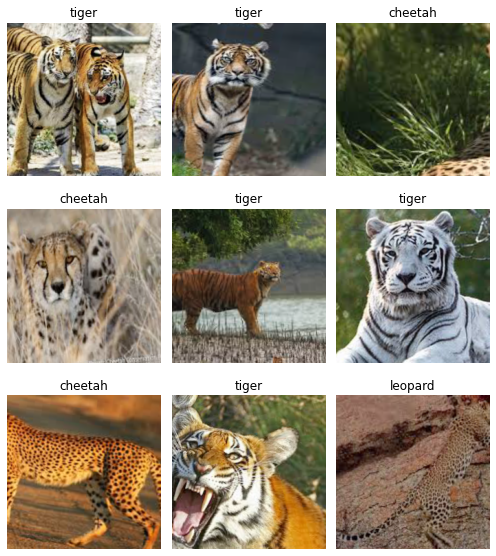

In [ ]:
data.show_batch(rows = 3 , figsize = (7,8))

In [ ]:
data.classes , data.c , len(data.train_ds) , len(data.valid_ds)

(['cheetah', 'leopard', 'tiger'], 3, 480, 120)

Training Model

In [ ]:
model = cnn_learner(data , models.resnet34 , metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
model.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.381450,0.174212,0.058333,00:10
1,0.745581,0.236490,0.041667,00:08
2,0.544157,0.251519,0.050000,00:08
3,0.418793,0.252231,0.050000,00:09


In [ ]:
model.save('stage-1')

In [ ]:
model.unfreeze()

In [ ]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


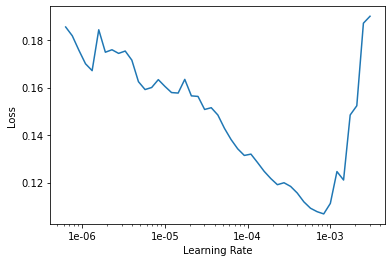

In [ ]:
model.recorder.plot()

In [ ]:
model.fit_one_cycle(3 , max_lr = slice(3e-04 , 3e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.326050,3.867867,0.216667,00:09
1,0.238359,0.709814,0.150000,00:10
2,0.201531,0.583591,0.141667,00:10


In [ ]:
model.save('stage-2')

Interpretation

In [ ]:
model.load('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(model)

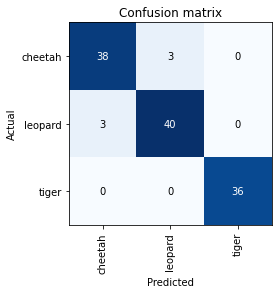

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
model.load('stage-2')

In [ ]:
inter = ClassificationInterpretation.from_learner(model)

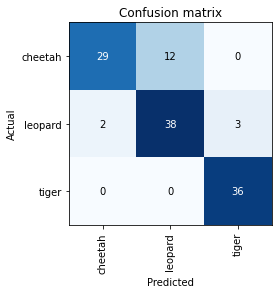

In [ ]:
inter.plot_confusion_matrix()

In [ ]:
from fastai.widgets import *
losses , idxs = interp.top_losses()
top_losses_paths = data.valid_ds.x[idxs]

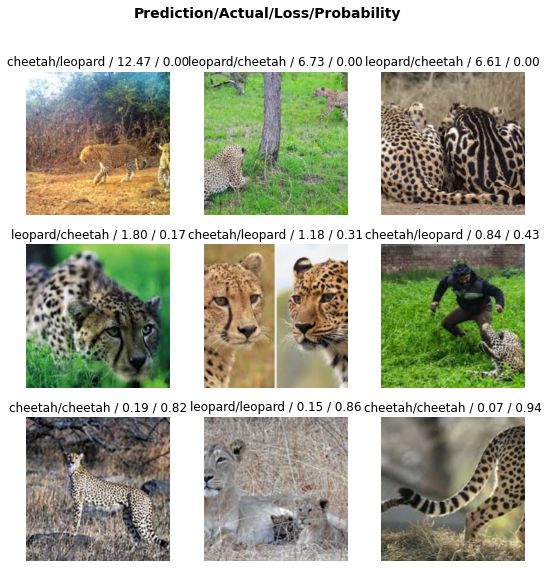

In [ ]:
interp.plot_top_losses(9 , figsize = (9,9))

In [ ]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2')

production of a model

In [ ]:
img = open_image('/content/drive/My Drive/datasets/cat_family/model_test.jpeg')
img

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
classes = ['leopard' , 'tiger' , 'cheetah']
data2 = ImageDataBunch.single_from_classes(path , classes , ds_tfms=get_transforms(),
                                           size = 224).normalize(imagenet_stats)

In [ ]:
learn = create_cnn(data2 , models.resnet34)
learn.load('stage-2')

In [ ]:
pred_class , pred_idx , outputs = learn.predict(img)
learn.data.classes[to_data(pred_class)]

'tiger'

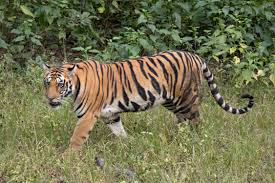

In [ ]:
img = open_image('/content/drive/My Drive/datasets/cat_family/model_test2.jpg')
img

In [ ]:
pred_class , pred_idx , outputs = learn.predict(img)
learn.data.classes[to_data(pred_class)]

'cheetah'